<a href="https://colab.research.google.com/github/tomohiko-urai/minnano_ai/blob/master/13_MatchTemplate2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# テンプレートマッチング ２


対象の画像からテンプレート画像を抽出する

<img src="https://storage.googleapis.com/iotcolab2023/022845332.jpg" width="30%" alt="source image"/>

「ソース画像」

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

In [ ]:
!wget https://storage.googleapis.com/iotcolab2023/022845332.jpg -O a.jpg

--2023-02-11 02:40:49--  https://storage.googleapis.com/iotcolab2023/022845332.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 559085 (546K) [image/jpeg]
Saving to: ‘a.jpg’

a.jpg               100%[===================>] 545.98K  --.-KB/s    in 0.008s  

2023-02-11 02:40:49 (65.5 MB/s) - ‘a.jpg’ saved [559085/559085]



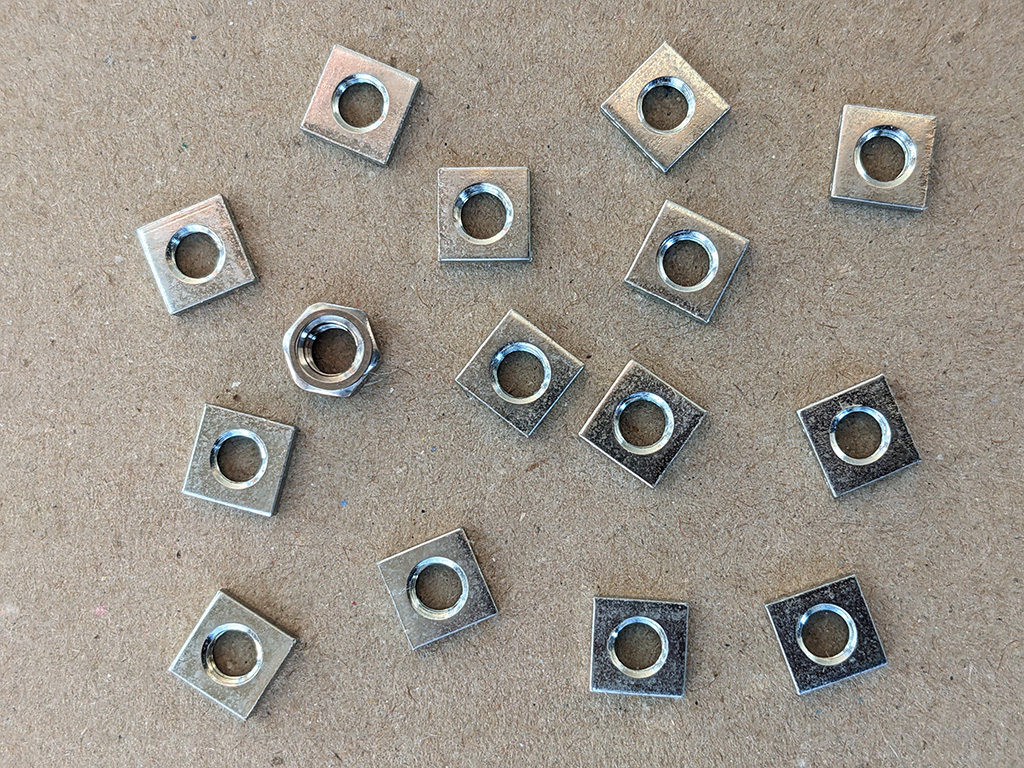

In [ ]:
img = cv2.imread('a.jpg')
cv2_imshow(img)

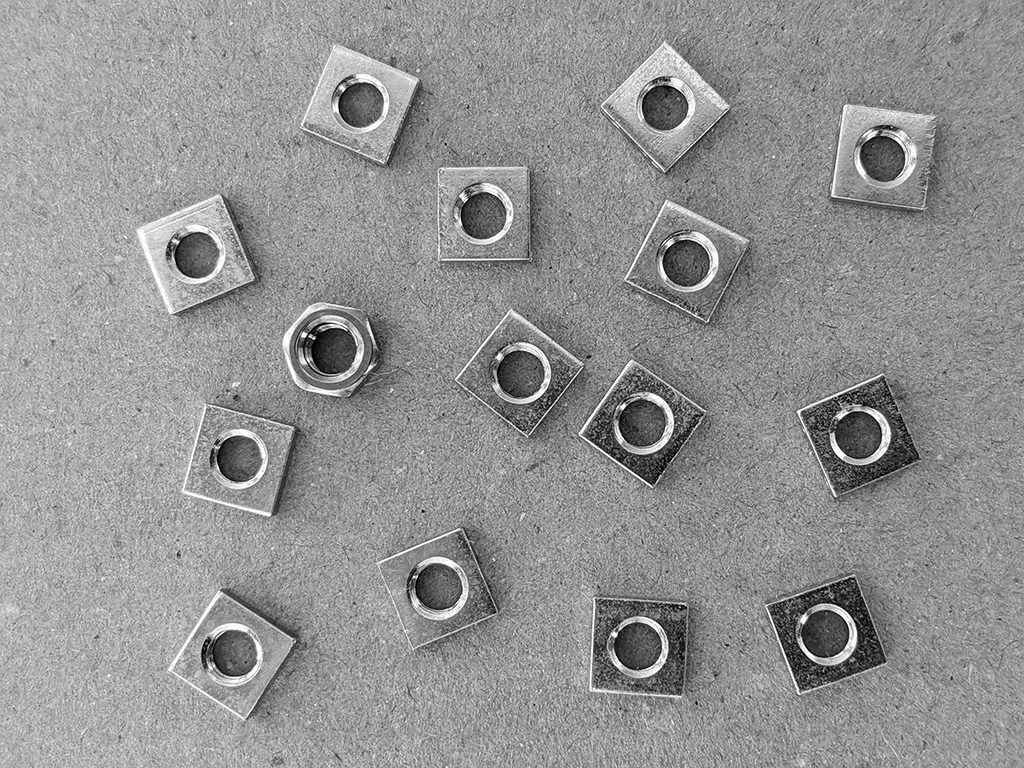

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(img_gray)

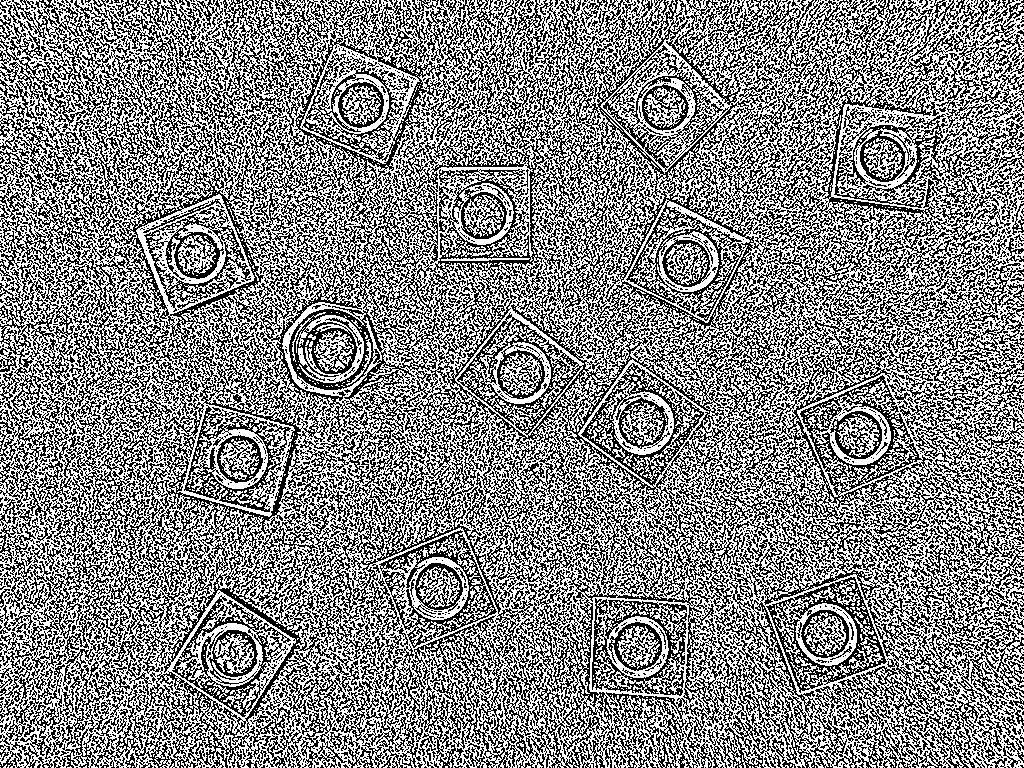

In [ ]:
img_bin = cv2.adaptiveThreshold (img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2_imshow(img_bin)

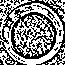

In [ ]:
temp = img_bin[180 : 245 , 450 : 515]
th, tw = temp.shape
cv2_imshow(temp)

In [ ]:
sh, sw = img_gray.shape
size = np.array([sh, sw, 3])
mask = np.full(size, (0, 0, 0), dtype = np.uint8)
mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
mask_inv = cv2.bitwise_not(mask)

In [ ]:
result = cv2.matchTemplate(image=img_bin, templ=temp, method=cv2.TM_CCOEFF_NORMED)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
result, minVal, maxVal, minLoc, maxLoc

(array([[-0.01597261, -0.01877278, -0.01444338, ..., -0.005403  ,
         -0.01419155, -0.0302988 ],
        [-0.02119287, -0.03163136, -0.00864946, ..., -0.00839599,
         -0.00425653, -0.01132573],
        [-0.01921756, -0.02583617, -0.02628075, ...,  0.00867315,
          0.03097612,  0.0061912 ],
        ...,
        [ 0.0260189 , -0.01086644, -0.0421899 , ..., -0.00050596,
         -0.00375004,  0.00267623],
        [ 0.01953696, -0.0116913 , -0.0510749 , ..., -0.01736334,
         -0.0262649 , -0.02512886],
        [ 0.04176095, -0.0056595 , -0.00502337, ...,  0.0179634 ,
         -0.01908732, -0.02603375]], dtype=float32),
 -0.08939515799283981,
 0.9999998211860657,
 (615, 383),
 (450, 180))

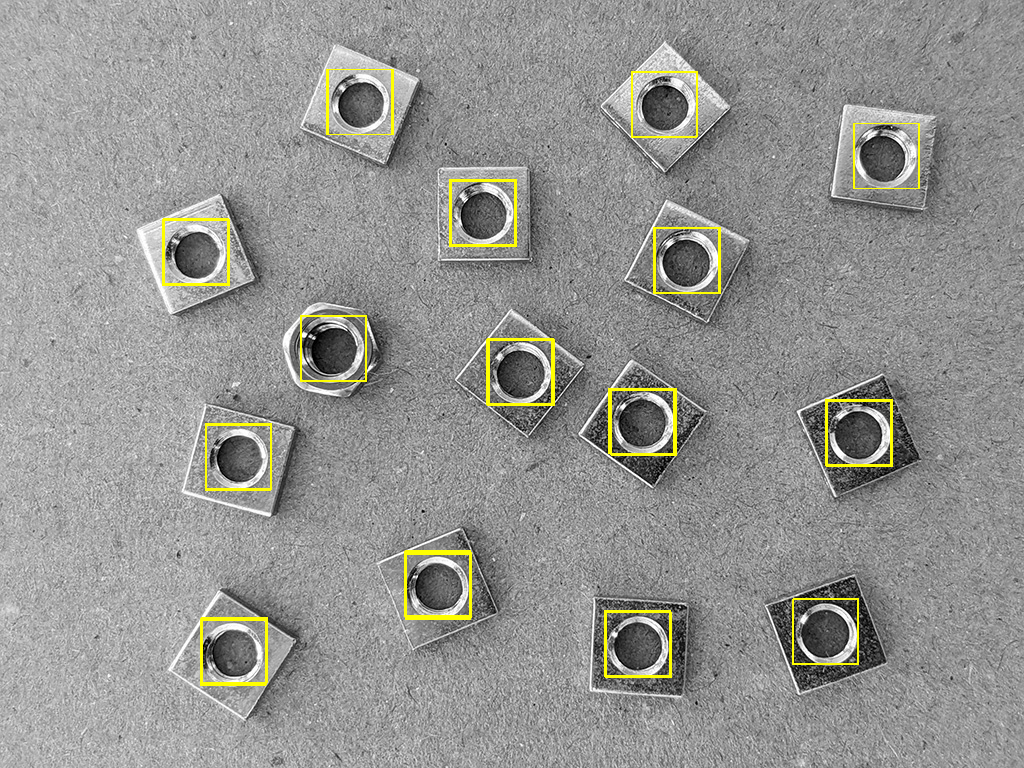

In [ ]:
img_color2 = cv2.cvtColor(img_gray.copy(), cv2.COLOR_GRAY2BGR)
color = np.array([0., 255., 255.])  # BGR表記
threshold = .1
loc = np.where(result >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_color2, pt, (pt[0] + tw, pt[1] + th), color, thickness=1)

cv2_imshow(img_color2)